Submission by Arisa Seljestokken

# Assignment 1

**Import libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import hashlib

**Defining the data in this project**

The dataset in this project is California Housing Prices, which is taken from Kaggle

In [2]:
housingData = pd.read_csv('housing_data.csv')
housingData

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.13,37.67,40.0,1748.0,318.0,914.0,317.0,3.8676,184000.0,NEAR BAY
1,-120.98,37.65,40.0,422.0,63.0,158.0,63.0,7.3841,172200.0,INLAND
2,-118.37,33.87,23.0,1829.0,331.0,891.0,356.0,6.5755,359900.0,<1H OCEAN
3,-117.89,33.90,23.0,1533.0,226.0,693.0,230.0,7.8980,258200.0,<1H OCEAN
4,-122.40,37.76,52.0,1529.0,385.0,1347.0,348.0,2.9312,239100.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
16507,-117.92,33.83,52.0,1514.0,301.0,855.0,293.0,3.6042,166400.0,<1H OCEAN
16508,-117.84,34.63,5.0,6739.0,1251.0,4614.0,1266.0,4.0020,115100.0,INLAND
16509,-117.69,33.58,5.0,6678.0,1011.0,2877.0,982.0,7.5177,330000.0,<1H OCEAN
16510,-117.30,34.10,49.0,60.0,11.0,76.0,13.0,2.5625,75000.0,INLAND


In [3]:
# This is the test data
housingTest = pd.read_csv('housing_test_data.csv')
housingTest

,Id,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,0,-122.27,37.87,35.0,3218.0,1108.0,1675.0,1000.0,1.7464,NEAR BAY
1,1,-118.94,34.18,24.0,3689.0,585.0,1898.0,581.0,5.9224,<1H OCEAN
2,2,-119.75,36.77,32.0,1962.0,399.0,1005.0,392.0,2.6726,INLAND
3,3,-118.34,33.93,32.0,1254.0,399.0,1281.0,386.0,2.2976,<1H OCEAN
4,4,-119.00,35.36,35.0,1021.0,280.0,1258.0,239.0,1.7375,INLAND
...,...,...,...,...,...,...,...,...,...,...
4123,4123,-118.02,34.08,28.0,2769.0,631.0,2452.0,581.0,2.6071,INLAND
4124,4124,-118.16,34.14,41.0,3039.0,482.0,973.0,446.0,7.4817,<1H OCEAN
4125,4125,-119.48,37.00,16.0,2904.0,551.0,1467.0,509.0,3.1736,INLAND
4126,4126,-119.79,34.45,24.0,2746.0,433.0,1076.0,380.0,5.8635,NEAR OCEAN


In [4]:
# This is a sample of how the submission file should look like
# Might not be necessary, but just in case! 
sampleSub = pd.read_csv('sample_submission.csv')
sampleSub

,Id,median_house_value
0,0,178050.0
1,1,178050.0
2,2,178050.0
3,3,178050.0
4,4,178050.0
...,...,...
4123,4123,178050.0
4124,4124,178050.0
4125,4125,178050.0
4126,4126,178050.0


In [5]:
# Take a quick look at the data structure by looking at top 5 rows using head() method
housingData.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.13,37.67,40.0,1748.0,318.0,914.0,317.0,3.8676,184000.0,NEAR BAY
1,-120.98,37.65,40.0,422.0,63.0,158.0,63.0,7.3841,172200.0,INLAND
2,-118.37,33.87,23.0,1829.0,331.0,891.0,356.0,6.5755,359900.0,<1H OCEAN
3,-117.89,33.90,23.0,1533.0,226.0,693.0,230.0,7.8980,258200.0,<1H OCEAN
4,-122.40,37.76,52.0,1529.0,385.0,1347.0,348.0,2.9312,239100.0,NEAR BAY


In [6]:
# Get a quick description of the data (total number of rows, attribute’s type and number of non-null values)
housingData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16512 entries, 0 to 16511
Data columns (total 10 columns):
longitude             16512 non-null float64
latitude              16512 non-null float64
housing_median_age    16512 non-null float64
total_rooms           16512 non-null float64
total_bedrooms        16344 non-null float64
population            16512 non-null float64
households            16512 non-null float64
median_income         16512 non-null float64
median_house_value    16512 non-null float64
ocean_proximity       16512 non-null object
dtypes: float64(9), object(1)
memory usage: 1.3+ MB


In [7]:
# Find out what categories exist and how many districts belong to each category by using the value_counts() method
housingData["ocean_proximity"].value_counts()

<1H OCEAN     7346
INLAND        5214
NEAR OCEAN    2112
NEAR BAY      1835
ISLAND           5
Name: ocean_proximity, dtype: int64

In [8]:
# describe() method shows a summary of the numerical attributes
housingData.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,16512.000000,16512.000000,16512.000000,16512.000000,16344.000000,16512.000000,16512.000000,16512.000000,16512.000000
mean,-119.568763,35.630270,28.714571,2636.885841,537.999755,1425.131783,499.837936,3.871083,207262.390080
std,2.003747,2.137134,12.589203,2195.840228,422.944167,1126.453504,383.400473,1.909994,115838.329585
min,-124.350000,32.540000,1.000000,6.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.790000,33.930000,18.000000,1445.000000,295.000000,787.000000,279.000000,2.562500,120000.000000
50%,-118.490000,34.260000,29.000000,2122.500000,434.000000,1163.000000,409.000000,3.529450,180400.000000
75%,-118.010000,37.710000,37.000000,3137.000000,646.000000,1723.000000,603.000000,4.746450,265100.000000
max,-114.310000,41.950000,52.000000,39320.000000,6210.000000,35682.000000,5358.000000,15.000100,500001.000000


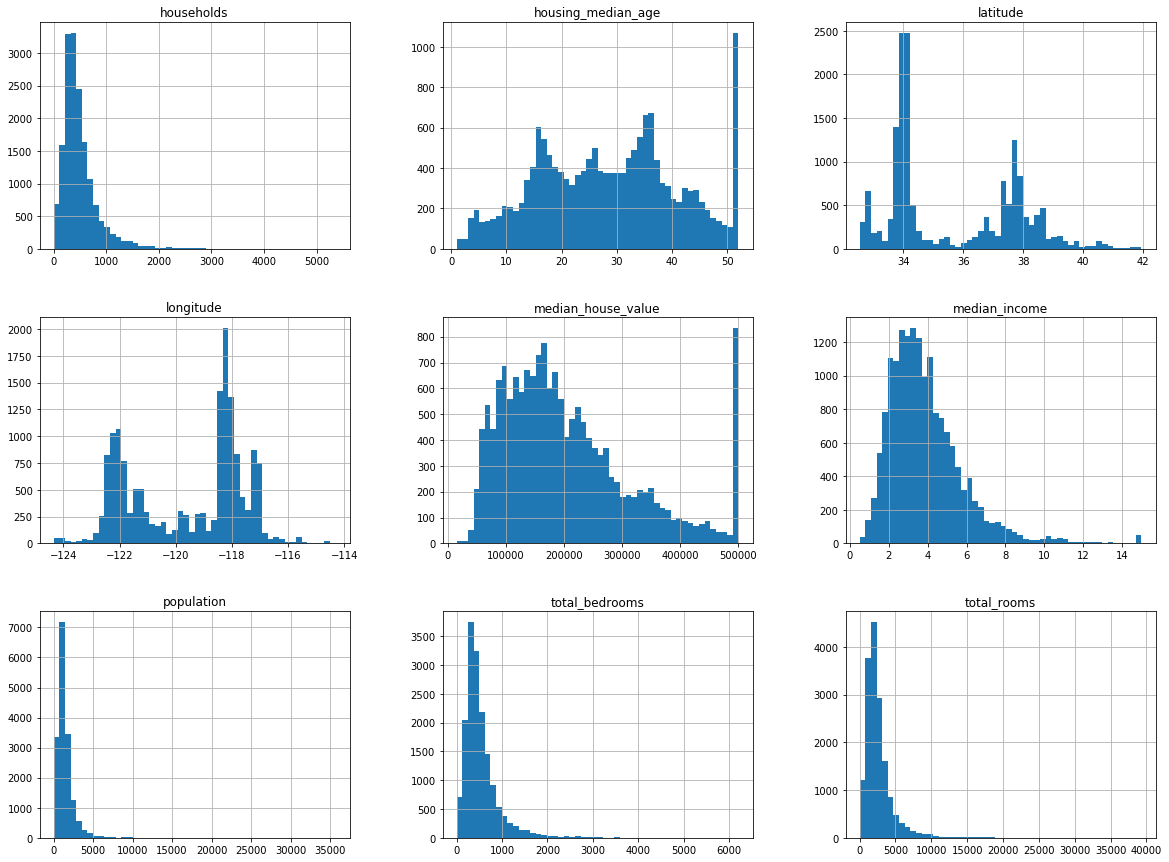

In [9]:
# hist() method shows what type of data we are dealing with by plotting histogram for each numerical attribute
# A histogram shows the number of instances on the vertical axis that have a given value range (horizontal axis)
housingData.hist(bins=50, figsize=(20,15))
plt.show()

**Create a Test Set**

We got the test set from Kaggle

In [10]:
test_set = housingTest.copy()

**Discover and Visualize the Data to Gain Insights**

We're putting the test set aside and now exploring the training set

In [11]:
# Created a copy so the training set doesn't get harmed
housing = housingData.copy()

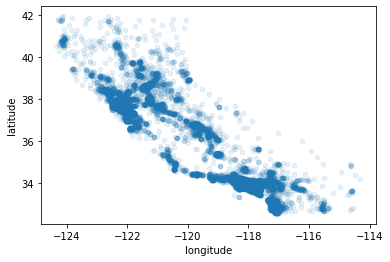

In [12]:
# As we have geographical data it is a good idea to visualize it with a scatterplot of all districts
# We set the alpha option to 0.1 to make it easier to visualize the places in California where there is a high density of data points
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)

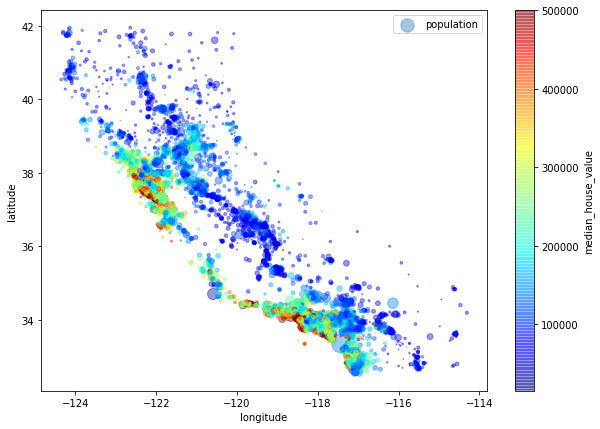

In [13]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
    s=housing["population"]/100, label="population", figsize=(10,7),
    c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)
plt.legend()

**Looking for Correlations**

In [14]:
# We compute the standard correlation coefficient between every pair of attributes using the corr() method
corr_matrix = housing.corr()
# See how much each attribute correlates with the median house value
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.684828
total_rooms           0.133566
housing_median_age    0.107684
households            0.065778
total_bedrooms        0.049941
population           -0.025008
longitude            -0.043824
latitude             -0.146748
Name: median_house_value, dtype: float64

Correlation coefficient ranges from –1 to 1. 
When close to 1: There is a strong positive correlation:
e.g. the median house value tends to go up when the median income goes up. 
When close to –1: There is a strong negative correlation;
When close to 0: There is no linear correlation.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0xa2280b590>,
      dtype=object)

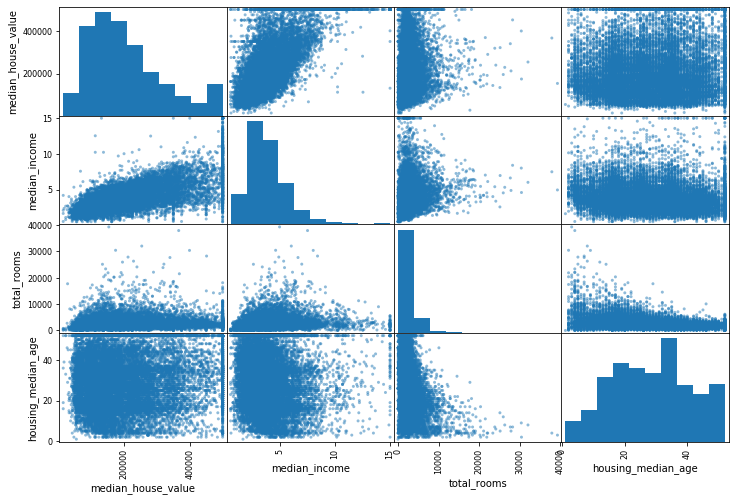

In [15]:
# Another way to check for correlation between attributes is to use Pandas’scatter_matrix function which plots 
# every numerical attribute against every other numerical attribute. We choose to focus on attributes that 
# seem most correlated with the median housing value
from pandas.plotting import scatter_matrix
attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8))

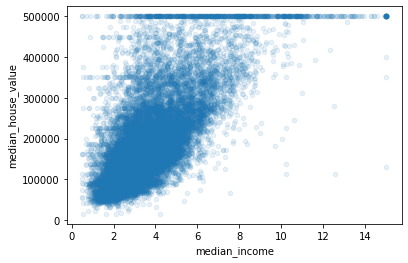

In [16]:
# The most promising attribute to predict the median house value is the median income, so we zoom in on their 
# correlation scatterplot
housingData.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.1)

**Experimenting with Attribute Combinations**

Before preparing the data for ML algorithm we are trying out various attribute combinations. Knowing total number of rooms in a district is useless if we don't know how many households there are. We are more interested in for example number of rooms per household

In [17]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]

We take a look at the correlation matrix again and see that bedrooms_per_room attribute is much more correlated with the median house value than the total number of rooms/bedrooms. We also see that houses with lower bedroom/room ratio tend to be more expensive.

In [18]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.684828
rooms_per_household         0.171947
total_rooms                 0.133566
housing_median_age          0.107684
households                  0.065778
total_bedrooms              0.049941
population                 -0.025008
population_per_household   -0.026596
longitude                  -0.043824
latitude                   -0.146748
bedrooms_per_room          -0.256396
Name: median_house_value, dtype: float64

**Prepare the Data for Machine Learning Algorithms**

Instead of preparing the data for ML algorithms manually, we are writing functions to do so for several good reasons

- It allows us to reproduce transformations easily on any dataset
- Building a library of transformation functions that we can reuse
- Able to use these functions in live system to transform the new data before feeding it to our algoritms
- Make it possible to try various transformation and see which combination of transformations work best

First we revert to a clean training set (by copying strat_train_set), and separate the predictors and the labels since we don’t necessarily want to apply the same transformations to the predictors and the target values (note that drop() creates a copy of the data and does not affect strat_train_set)

In [19]:
housingData = housing.drop("median_house_value", axis=1)
housing_labels = housing["median_house_value"].copy()

**Data Cleaning**

Most ML algorithms cannot work with missing features, so we create some functions to take care of them. The attribute total_bedrooms has some missing values, so we are fixing this. There are 3 options we can choose between, we are choosing option 3 in the book.

In [20]:
median = housingData["total_bedrooms"].median()
housingData["total_bedrooms"].fillna(median)

0         318.0
1          63.0
2         331.0
3         226.0
4         385.0
          ...  
16507     301.0
16508    1251.0
16509    1011.0
16510      11.0
16511     780.0
Name: total_bedrooms, Length: 16512, dtype: float64

In [21]:
# Scikit-learn provides SimpleImputer, a handy class to take care of missing values
# We create a SimpleImputer instance specifying that we want to replace each attribute's 
# missing values with the median of that attribute
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

In [22]:
# Since the median can only be computed on numerical attributes, we need to create a
# copy of the data without the text attribute ocean_proximity:
housing_num = housingData.drop("ocean_proximity", axis=1)

In [23]:
# Now we can fit the imputer instance to the training data using fit() method
imputer.fit(housing_num)

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='median', verbose=0)

In [24]:
# The imputer has simply computed the median of each attribute and stored the result
# in its statistics_ instance variable
imputer.statistics_

array([-1.18490000e+02,  3.42600000e+01,  2.90000000e+01,  2.12250000e+03,
        4.34000000e+02,  1.16300000e+03,  4.09000000e+02,  3.52945000e+00,
        5.23037312e+00,  2.03218472e-01,  2.82156299e+00])

In [25]:
# Only the total_bedrooms attribute had missing values, but we cannot be sure that there won’t be any missing values in new data after
# the system goes live, so it is safer to apply the imputer to all the numerical attributes
housing_num.median().values

array([-1.18490000e+02,  3.42600000e+01,  2.90000000e+01,  2.12250000e+03,
        4.34000000e+02,  1.16300000e+03,  4.09000000e+02,  3.52945000e+00,
        5.23037312e+00,  2.03218472e-01,  2.82156299e+00])

In [26]:
# We can now use the trained imputer to transform the training set by replacing missing values 
# by the learned medians
# The result is a plain Numpy array containing the transformed features
X = imputer.transform(housing_num)

In [27]:
# To put it back into a Pandas DataFrame
housing_tr = pd.DataFrame(X, columns=housing_num.columns,index=housing_num.index)

**Handling Text and Categorical Attributes**

Earlier we left out the categorical attribute ocean_proximity because it is a text attribute so we cannot compute its median. Most ML algorithms prefer to work with numbers so we convert these text labels to numbers. Scikit-Learn provides a transformer for this task called OrdinalEncoder

In [28]:
from sklearn.preprocessing import OrdinalEncoder

encoder = OrdinalEncoder()
housing_cat = housingData[["ocean_proximity"]]
housing_cat_encoded = encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]

array([[3.],
       [1.],
       [0.],
       [0.],
       [3.],
       [0.],
       [1.],
       [3.],
       [1.],
       [1.]])

Now we can use this numerical data in any ML algorithm

In [29]:
encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

One issue with this representation is that ML algorithms will assume that two nearby values are more similar than two distant values. To fix this, a common solution is to create one binary attribute per category: one attribute equal to 1 when the category is “<1H OCEAN” (and 0 otherwise), another attribute equal to 1 when the category is “INLAND” (and 0 otherwise), and so on. This is called one-hot encoding, because only one attribute will be equal to 1 (hot), while the others will be 0 (cold).

In [30]:
# Scikit-Learn provides a OneHotEncoder encoder to convert integer categorical values into one-hot vectors
# We encode the categories as one-hot vectors. Note that fit_transform() expects a 2D array, but 
# housing_cat_encoded is a 1D array, so we need to reshape it
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()
housing_cat_1hot = encoder.fit_transform(housing_cat)
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

By default, the OneHotEncoder class returns a sparse array, but we can convert it to a dense NumPy array by calling the toarray() method

In [31]:
housing_cat_1hot.toarray()

array([[0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

We can apply both transformations (from text categories to integer categories, then from integer categories to one-hot vectors) in one shot using the LabelBinarizer class

In [32]:
from sklearn.preprocessing import LabelBinarizer
encoder = LabelBinarizer()
housing_cat_1hot = encoder.fit_transform(housing_cat)
housing_cat_1hot

array([[0, 0, 0, 1, 0],
       [0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0],
       ...,
       [1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0]])

**Custom Transformers**

Although Scikit-Learn provides many useful transformers, we need to write our own for tasks such as custom cleanup operations or combining specific attributes. We want our transformer to work with Scikit-Learn functionalities such as pipelines. Since Scikit-Learn relies on duck typing (not inheritance), we only need to create a class and implement 3 methods; fit(), transform(), and fit_transform(). The last one can be added by adding TransformerMixin as a base class. By adding BaseEstimator as a base class we get 2 extra methods (get_params() and set_params()) that is useful for automatic hyperparameter tuning. Below is a small transformer class that adds the combined attributes

Here the transformer has one hyperparameter (add_bedrooms_per_room) set to True by default. This hyperparameter allows us to find out whether adding this attribute helps the ML algorithms or not. More generally, we can add a hyperparameter to gate any data preparation step that we are not 100% sure about. The more we automate these data preparation steps, the more combinations we can automatically try out, making it much more likely that we will find a great combination and save time.

In [33]:
from sklearn.base import BaseEstimator, TransformerMixin

rooms_ix, bedrooms_ix, population_ix, household_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
     def __init__(self, add_bedrooms_per_room = True):
         self.add_bedrooms_per_room = add_bedrooms_per_room
     def fit(self, X, y=None):
         return self
     def transform(self, X, y=None):
         rooms_per_household = X[:, rooms_ix] / X[:, household_ix]
         population_per_household = X[:, population_ix] / X[:, household_ix]
         if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
 bedrooms_per_room]
         else:
            return np.c_[X, rooms_per_household, population_per_household]
        
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housingData.values)

In [34]:
housing_extra_attribs = pd.DataFrame(
    housing_extra_attribs,
    columns=list(housingData.columns)+["rooms_per_household", "population_per_household"],
    index=housingData.index)
housing_extra_attribs.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household,rooms_per_household,population_per_household
0,-122.13,37.67,40,1748,318,914,317,3.8676,NEAR BAY,5.5142,0.181922,2.88328,5.5142,2.88328
1,-120.98,37.65,40,422,63,158,63,7.3841,INLAND,6.69841,0.149289,2.50794,6.69841,2.50794
2,-118.37,33.87,23,1829,331,891,356,6.5755,<1H OCEAN,5.13764,0.180973,2.50281,5.13764,2.50281
3,-117.89,33.9,23,1533,226,693,230,7.898,<1H OCEAN,6.66522,0.147423,3.01304,6.66522,3.01304
4,-122.4,37.76,52,1529,385,1347,348,2.9312,NEAR BAY,4.39368,0.251799,3.87069,4.39368,3.87069


**Exercise 3**

In [86]:
from sklearn.base import BaseEstimator, TransformerMixin

def indices_of_top_k(arr, k):
    return np.sort(np.argpartition(np.array(arr), -k)[-k:])

class TopFeatureSelector(BaseEstimator, TransformerMixin):
    def __init__(self, feature_importances, k):
        self.feature_importances = feature_importances
        self.k = k
    def fit(self, X, y=None):
        self.feature_indices_ = indices_of_top_k(self.feature_importances, self.k)
        return self
    def transform(self, X):
        return X[:, self.feature_indices_]

In [88]:
k = 5

In [89]:
top_k_feature_indices = indices_of_top_k(feature_importances, k)
top_k_feature_indices

array([ 0,  7, 10, 12, 15])

In [90]:
np.array(attributes)[top_k_feature_indices]

array(['longitude', 'median_income', 'population_per_household',
       'pop_per_hhold', 'INLAND'], dtype='<U24')

**Feature Scaling**

One of the most important transformations we need to apply to our data is feature scaling. With few exceptions, ML algorithms don’t perform well when the input numerical attributes have very different scales. This is the case for the housing data: the total number of rooms ranges from about 6 to 39,320, while the median incomes only range from 0 to 15. There are 2 common ways to get all attributes to have the same scale; min-maxscaling(normalization) and standardization. With normalization values are shifted and rescaled so that they end up ranging from 0-1. We achieve this by subtracting the min value and dividing by the max minus the min. Scikit-Learn provides a
transformer called MinMaxScaler for this. It has a feature_range hyperparameter that lets us change the range if we don’t want 0–1. With standardization first it subtracts the mean value (so standardized values always have a zero mean), then it divides by the variance so that the resulting distribution has unit variance. Unlike min-max scaling, standardization does not bound values to a specific range, which may be a problem for some algorithms. However, standardization is much less affected by outliers. For example, suppose a district had a median income equal to 100 by mistake. Min-max scaling would then crush all the other values from 0–15 down to 0–0.15, whereas standardization would not be much affected. Scikit-Learn provides a transformer called StandardScaler for standardization.

**Transformation Pipelines**

Many data transformation steps need to be executed in the right order. Scikit-Learn provides the Pipeline class to help with such sequences of transformations. Below is a small pipeline for the numerical
attributes

In [35]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler()),
])

housing_num_tr = num_pipeline.fit_transform(housing_num)

The Pipeline constructor takes a list of estimator pairs defining a sequence of steps. When calling the pipeline’s fit() method, it calls fit_transform() sequentially on all transformers, passing the output of each call as the parameter to the next call, until it reaches the final estimator, for which it just calls the fit() method. The pipeline exposes the same methods as the final estimator. In our example, the last estimator is a StandardScaler, which is a transformer, so the pipeline has a transform() method that applies all the transforms to the data in sequence (it also has a fit_transform method that we could have used instead of calling fit() and then transform()). We now have a pipeline for numerical values. We also need to apply the LabelBinarizer on the categorical values, to join these transformations into a single pipeline, we use Scikit-Learn's ColumnTransformer

Chose ColumnTransformer instead of DataFrameSelector which is an old solution according to the author of the book.

In [92]:
from sklearn.compose import ColumnTransformer

num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", OneHotEncoder(), cat_attribs)
])

housing_prepared = full_pipeline.fit_transform(housingData)
housing_prepared

array([[-1.27826235,  0.95445204,  0.89646428, ...,  0.        ,
         1.        ,  0.        ],
       [-0.70432019,  0.94509343,  0.89646428, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.59827896, -0.82368426, -0.45394013, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.93765346, -0.95938413, -1.88378009, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.13229471, -0.71606022,  1.61138426, ...,  0.        ,
         0.        ,  0.        ],
       [-1.0985935 ,  1.10418984, -1.96321564, ...,  0.        ,
         0.        ,  0.        ]])

In [97]:
# Exercise 3
preparation_and_feature_selection_pipeline = Pipeline([
    ('preparation', full_pipeline),
    ('feature_selection', TopFeatureSelector(feature_importances, k))
])

In [99]:
# Exercise 3
housing_prepared_top_k_features = preparation_and_feature_selection_pipeline.fit_transform(housingData)

In [100]:
# Exercise 3
housing_prepared_top_k_features[0:3]

array([[-1.27826235e+00, -1.82377323e-03, -1.69369340e-02,
        -1.69369340e-02,  0.00000000e+00],
       [-7.04320194e-01,  1.83933698e+00, -5.13545950e-02,
        -5.13545950e-02,  1.00000000e+00],
       [ 5.98278964e-01,  1.41597210e+00, -5.18247693e-02,
        -5.18247693e-02,  0.00000000e+00]])

In [101]:
# Exercise 3
housing_prepared[0:3, top_k_feature_indices]

array([[-1.27826235e+00, -1.82377323e-03, -1.69369340e-02,
        -1.69369340e-02,  0.00000000e+00],
       [-7.04320194e-01,  1.83933698e+00, -5.13545950e-02,
        -5.13545950e-02,  1.00000000e+00],
       [ 5.98278964e-01,  1.41597210e+00, -5.18247693e-02,
        -5.18247693e-02,  0.00000000e+00]])

In [104]:
# Exercise 4 
# Try creating a single pipeline that does the full data preparation plus the final prediction
prepare_select_and_predict_pipeline = Pipeline([
    ('preparation', full_pipeline),
    ('feature_selection', TopFeatureSelector(feature_importances, k)),
    ('svm_reg', SVR(**rnd_search.best_params_))
])

In [106]:
# Exercise 4
prepare_select_and_predict_pipeline.fit(housingData, housing_labels)

Pipeline(memory=None,
         steps=[('preparation',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('num',
                                                  Pipeline(memory=None,
                                                           steps=[('imputer',
                                                                   SimpleImputer(add_indicator=False,
                                                                                 copy=True,
                                                                                 fill_value=None,
                                                                                 missing_values=nan,
                                                                                 strategy='median',
                                                              

In [107]:
# Exercise 4
some_data = housingData.iloc[:4]
some_labels = housing_labels.iloc[:4]

print("Predictions:\t", prepare_select_and_predict_pipeline.predict(some_data))
print("Labels:\t\t", list(some_labels))

Predictions:	 [227211.09214395 285690.81821798 384985.14212248 410010.35182779]
Labels:		 [184000.0, 172200.0, 359900.0, 258200.0]


In [102]:
housing_prepared.shape

(16512, 19)

**Select and train a model**

We have now framed the problem, we've got the data and explored it. We sampled a training set and a test set, and wrote transformation pipelines to clean up and prepare the data for ML algorithms automatically. We are now ready to select and train a ML model

**Training and Evaluating on the Training Set**

We start with training a Linear Regression model

In [38]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

We try it out on a few instances from the training set

In [39]:
some_data = housingData.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)

print("Predictions:", lin_reg.predict(some_data_prepared))

Predictions: [231360.94291389 305025.61344487 327563.41395073 355171.70203222
 212777.69924771]


Compare against the actual values

In [40]:
print("Labels:", list(some_labels))

Labels: [184000.0, 172200.0, 359900.0, 258200.0, 239100.0]


This works although the predictions are not exactly accurate. We try to measure this regression model’s RMSE on the whole
training set using Scikit-Learn’s mean_squared_error function

In [41]:
from sklearn.metrics import mean_squared_error

housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68406.03601782877

Clearly this is not a great score (most districts’ median_housing_values range between 120 000 - 265 000) so a typical prediction error of 68 406 is not very satisfying. This is an example of a model underfitting
the training data. When this happens it can mean that the features do not provide enough information to make good predictions, or that the model is not powerful enough. The main ways to fix underfitting are to select a more powerful model, to feed the training algorithm with better features, or to reduce the constraints on the model. Our model is not regularized, so this rules out the last option. We could try to add more features, but first we can try a more complex model to see how it does. We train a DecisionTreeRegressor, a powerful model that is capable of finding complex nonlinear relationships in the data.

In [42]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=42, splitter='best')

Now that our model is trained, we evaluate it on the training set

In [43]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

0.0 means no error at all, but it is much more likely that the model has badly overfit the data. We need to use part of the training set for training, and part for model validation.

**Better Evaluation Using Cross-Validation**

One way to evaluate the Decision Tree model would be to use the train_test_split function to split the training set into a smaller training set and a validation set, then train our models against the smaller training set and evaluate them against the validation set. We can use Scikit-Learn’s cross-validation feature. The code belows performs K-fold cross-validation: it randomly splits the training set into 10 distinct subsets called folds, then it trains and evaluates the Decision Tree model 10 times, picking a different fold for evaluation every time and training on the other 9 folds. The result is an array containing the 10 evaluation scores.

In [44]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)

tree_rmse_scores = np.sqrt(-scores)

In [45]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())
    
display_scores(tree_rmse_scores)

Scores: [71977.99201276 71454.69800591 71692.60352904 70100.86164367
 73701.88246759 67874.26566166 73096.07231863 71488.94865513
 70772.1122785  70467.89506436]
Mean: 71262.73316372637
Standard deviation: 1542.696450491916


The Decision Tree doesn’t look as good as it did earlier, and seems to perform worse than the Linear Regression model. Cross-validation allows
us to get not only an estimate of the performance of the model, but also a measure of how precise this estimate is. However cross-validation comes at the cost of training the model several times, so it is not always possible. We compute the same scores for the Linear Regression model just to be sure.

In [46]:
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [70565.84515504 66152.3454739  73430.76173763 66237.51549525
 69367.75005715 68702.57115463 65545.44702048 66693.45231399
 72938.49546918 67162.1988898 ]
Mean: 68679.63827670482
Standard deviation: 2704.8978399706866


We see that the Decision Tree model is overfitting so badly that it performs worse than the Linear Regression model. We try one last model, the RandomForestRegressor. In Chapter 7 we will see that Random Forests work by training many Decision Trees on random subsets of the features, then averaging out their predictions. Building a model on top of many other models is called Ensemble Learning, and it is often a great way to push ML algorithms even further. We will skip most of the code since it is essentially the same as for the other models

In [47]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(housing_prepared, housing_labels)
housing_predictions = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

18554.905163470743

In [48]:
forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [52187.40020274 47337.70895784 49086.78175292 50675.53965798
 51221.46484689 49230.91764573 49408.04751311 48595.95823741
 54211.34898813 49349.83265258]
Mean: 50130.50004553191
Standard deviation: 1885.627613150415


Random Forests look very promising, but the score on the training set is still much lower than on the validation sets, meaning
that the model is still overfitting the training set. Possible solutions for overfitting are to simplify the model, constrain it or get a lot more training data. Before we dive much deeper in Random Forests, we should try out many other models from various categories of ML algorithms, without spending too much time tweaking the hyperparameters. The goal is to shortlist a few promising models (2-5).

**Fine-Tune Your Model**

We assume that we now have a shortlist of promising models, and now need to fine-tune them. There are a few ways to achieve this

**Grid search**

One way to fine-tune would be to fiddle with the hyperparameters manually, until we find a great combination of hyperparameter values. As we may not have time to explore many combinations we can use ScikitLearn’s GridSearchCV to search for us. All we need to do is give the GridSearchCV hyperparameters we want it to experiment with, and what values to try out. Then it will evaluate all the possible combinations of hyperparameter values, using cross-validation. For example, the code below searches for the best combination of hyperparameter values for the RandomForestRegressor

In [72]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    # try 12 (3x4) combinations of hyperparameters
    {'n_estimators': [3,10,30], 'max_features': [2,4,6,8]},
    # then try 6 (2x3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3,10], 'max_features': [2,3,4]},
]  

forest_reg = RandomForestRegressor(random_state=42)
# train across 5 folds, that's a total of (12+6)*5 = 90 rounds of training
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=42,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid=[{'max_features': [2, 4, 6, 8],
  

param_grid tells Scikit-Learn to first evaluate all 3 × 4 = 12 combinations of n_estimators and max_features hyperparameter values specified in the first dict, then try all 2 × 3 = 6 combinations of hyperparameter values in the second dict, but this time with the bootstrap hyperparameter set to False instead of True (which is the default value for this hyperparameter). All in all, the grid search will explore 12 + 6 = 18 combinations of RandomForestRegressor hyperparameter values, and it will train each model five times (since we are using five-fold cross validation). All in all, there will be 18 × 5 = 90 rounds of training. It may take quite a long time, but when it is done you can get the best combination of parameters.

In [73]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

You can also get the best estimator directly

In [74]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features=8, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=30,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

Let's look at the score of each hyperparameter combination tested during the grid search

In [77]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

65827.73989719266 {'max_features': 2, 'n_estimators': 3}
57023.59482434236 {'max_features': 2, 'n_estimators': 10}
54414.12779903398 {'max_features': 2, 'n_estimators': 30}
61522.14723781285 {'max_features': 4, 'n_estimators': 3}
54392.63228147587 {'max_features': 4, 'n_estimators': 10}
52053.276050159424 {'max_features': 4, 'n_estimators': 30}
61219.37607960858 {'max_features': 6, 'n_estimators': 3}
53861.62140599669 {'max_features': 6, 'n_estimators': 10}
51284.72594008867 {'max_features': 6, 'n_estimators': 30}
60173.97897762322 {'max_features': 8, 'n_estimators': 3}
52856.97529327934 {'max_features': 8, 'n_estimators': 10}
50894.17506555465 {'max_features': 8, 'n_estimators': 30}
64384.66613083755 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
56283.62268972682 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
61319.1387270647 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
53268.30170864412 {'bootstrap': False, 'max_features': 3, 'n_estimators': 10

In this example, we obtain the best solution by setting the max_features hyperparameter to 6, and the n_estimators hyperparameter to 30. The RMSE score for this combination is 49,959, which is slightly better than the score earlier using the default hyperparameter values. We now have successfully fine-tuned our best model.

**Randomized Search**

The grid search approach is fine when we are exploring few combinations,
like in the previous example, but when the hyperparameter search space is large, it is preferable to use RandomizedSearchCV instead. This class can be used in almost the same way as the GridSearchCV class, but instead of trying out all possible combinations, it evaluates a given number of random combinations by selecting a random value for each hyperparameter at every iteration. This approach has two main benefits

- If we let the randomized search run for 1,000 iterations, this approach will explore 1,000 different values for each hyperparameter instead of just a few values per hyperparameter with the grid search approach
- We have more control over the computing budget we want to allocate to hyperparameter search by setting the number of iterations

In [53]:
from sklearn.svm import SVR

svm_reg = SVR(kernel="linear")
svm_reg.fit(housing_prepared, housing_labels)
housing_predictions = svm_reg.predict(housing_prepared)
svm_mse = mean_squared_error(housing_labels, housing_predictions)
svm_rmse = np.sqrt(svm_mse)
svm_rmse

110612.16022143466

In [54]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import expon, reciprocal

param_distribs = {
        'kernel': ['linear', 'rbf'],
        'C': reciprocal(20, 200000),
        'gamma': expon(scale=1.0),
    }

svm_reg = SVR()
rnd_search = RandomizedSearchCV(svm_reg, param_distributions=param_distribs,
                                n_iter=50, cv=5, scoring='neg_mean_squared_error',
                                verbose=2, random_state=42)
rnd_search.fit(housing_prepared, housing_labels)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] C=629.782329591372, gamma=3.010121430917521, kernel=linear ......


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  C=629.782329591372, gamma=3.010121430917521, kernel=linear, total=   5.6s
[CV] C=629.782329591372, gamma=3.010121430917521, kernel=linear ......


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.6s remaining:    0.0s


[CV]  C=629.782329591372, gamma=3.010121430917521, kernel=linear, total=   5.9s
[CV] C=629.782329591372, gamma=3.010121430917521, kernel=linear ......
[CV]  C=629.782329591372, gamma=3.010121430917521, kernel=linear, total=   5.3s
[CV] C=629.782329591372, gamma=3.010121430917521, kernel=linear ......
[CV]  C=629.782329591372, gamma=3.010121430917521, kernel=linear, total=   5.1s
[CV] C=629.782329591372, gamma=3.010121430917521, kernel=linear ......
[CV]  C=629.782329591372, gamma=3.010121430917521, kernel=linear, total=   5.1s
[CV] C=26290.206464300216, gamma=0.9084469696321253, kernel=rbf ......
[CV]  C=26290.206464300216, gamma=0.9084469696321253, kernel=rbf, total=  10.0s
[CV] C=26290.206464300216, gamma=0.9084469696321253, kernel=rbf ......
[CV]  C=26290.206464300216, gamma=0.9084469696321253, kernel=rbf, total=  10.3s
[CV] C=26290.206464300216, gamma=0.9084469696321253, kernel=rbf ......
[CV]  C=26290.206464300216, gamma=0.9084469696321253, kernel=rbf, total=  10.2s
[CV] C=26290.2

[CV]  C=171377.39570378003, gamma=0.628789100540856, kernel=linear, total=  40.7s
[CV] C=171377.39570378003, gamma=0.628789100540856, kernel=linear ....
[CV]  C=171377.39570378003, gamma=0.628789100540856, kernel=linear, total=  41.6s
[CV] C=171377.39570378003, gamma=0.628789100540856, kernel=linear ....
[CV]  C=171377.39570378003, gamma=0.628789100540856, kernel=linear, total=  46.9s
[CV] C=171377.39570378003, gamma=0.628789100540856, kernel=linear ....
[CV]  C=171377.39570378003, gamma=0.628789100540856, kernel=linear, total=  44.8s
[CV] C=171377.39570378003, gamma=0.628789100540856, kernel=linear ....
[CV]  C=171377.39570378003, gamma=0.628789100540856, kernel=linear, total=  37.0s
[CV] C=5385.293820172355, gamma=0.18696125197741642, kernel=linear ...
[CV]  C=5385.293820172355, gamma=0.18696125197741642, kernel=linear, total=   6.2s
[CV] C=5385.293820172355, gamma=0.18696125197741642, kernel=linear ...
[CV]  C=5385.293820172355, gamma=0.18696125197741642, kernel=linear, total=   6.6

[CV]  C=761.4316758498783, gamma=2.6126336514161914, kernel=linear, total=   5.0s
[CV] C=97392.81883041795, gamma=0.09265545895311562, kernel=linear ...
[CV]  C=97392.81883041795, gamma=0.09265545895311562, kernel=linear, total=  26.1s
[CV] C=97392.81883041795, gamma=0.09265545895311562, kernel=linear ...
[CV]  C=97392.81883041795, gamma=0.09265545895311562, kernel=linear, total=  26.5s
[CV] C=97392.81883041795, gamma=0.09265545895311562, kernel=linear ...
[CV]  C=97392.81883041795, gamma=0.09265545895311562, kernel=linear, total=  24.2s
[CV] C=97392.81883041795, gamma=0.09265545895311562, kernel=linear ...
[CV]  C=97392.81883041795, gamma=0.09265545895311562, kernel=linear, total=  25.4s
[CV] C=97392.81883041795, gamma=0.09265545895311562, kernel=linear ...
[CV]  C=97392.81883041795, gamma=0.09265545895311562, kernel=linear, total=  21.5s
[CV] C=2423.0759984939164, gamma=3.248614270240346, kernel=linear ....
[CV]  C=2423.0759984939164, gamma=3.248614270240346, kernel=linear, total=   

[CV]  C=56681.80859029545, gamma=0.9763011917123741, kernel=rbf, total=  17.4s
[CV] C=56681.80859029545, gamma=0.9763011917123741, kernel=rbf .......
[CV]  C=56681.80859029545, gamma=0.9763011917123741, kernel=rbf, total=  18.6s
[CV] C=48.15822390928914, gamma=0.4633351167983427, kernel=rbf .......
[CV]  C=48.15822390928914, gamma=0.4633351167983427, kernel=rbf, total=   7.5s
[CV] C=48.15822390928914, gamma=0.4633351167983427, kernel=rbf .......
[CV]  C=48.15822390928914, gamma=0.4633351167983427, kernel=rbf, total=   7.5s
[CV] C=48.15822390928914, gamma=0.4633351167983427, kernel=rbf .......
[CV]  C=48.15822390928914, gamma=0.4633351167983427, kernel=rbf, total=   7.6s
[CV] C=48.15822390928914, gamma=0.4633351167983427, kernel=rbf .......
[CV]  C=48.15822390928914, gamma=0.4633351167983427, kernel=rbf, total=   7.5s
[CV] C=48.15822390928914, gamma=0.4633351167983427, kernel=rbf .......
[CV]  C=48.15822390928914, gamma=0.4633351167983427, kernel=rbf, total=   7.5s
[CV] C=399.7268155705

[CV]  C=129.8000604143307, gamma=2.8621383676481322, kernel=linear, total=   5.0s
[CV] C=129.8000604143307, gamma=2.8621383676481322, kernel=linear ....
[CV]  C=129.8000604143307, gamma=2.8621383676481322, kernel=linear, total=   4.9s
[CV] C=129.8000604143307, gamma=2.8621383676481322, kernel=linear ....
[CV]  C=129.8000604143307, gamma=2.8621383676481322, kernel=linear, total=   4.8s
[CV] C=288.4269299593897, gamma=0.17580835850006285, kernel=rbf ......
[CV]  C=288.4269299593897, gamma=0.17580835850006285, kernel=rbf, total=   7.5s
[CV] C=288.4269299593897, gamma=0.17580835850006285, kernel=rbf ......
[CV]  C=288.4269299593897, gamma=0.17580835850006285, kernel=rbf, total=   7.4s
[CV] C=288.4269299593897, gamma=0.17580835850006285, kernel=rbf ......
[CV]  C=288.4269299593897, gamma=0.17580835850006285, kernel=rbf, total=   7.5s
[CV] C=288.4269299593897, gamma=0.17580835850006285, kernel=rbf ......
[CV]  C=288.4269299593897, gamma=0.17580835850006285, kernel=rbf, total=   7.5s
[CV] C=2

[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed: 51.5min finished


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                                 epsilon=0.1, gamma='auto_deprecated',
                                 kernel='rbf', max_iter=-1, shrinking=True,
                                 tol=0.001, verbose=False),
                   iid='warn', n_iter=50, n_jobs=None,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x1a25af34d0>,
                                        'gamma': <scipy.stats._distn_infrastructure.rv_frozen object at 0x1a25af3710>,
                                        'kernel': ['linear', 'rbf']},
                   pre_dispatch='2*n_jobs', random_state=42, refit=True,
                   return_train_score=False, scoring='neg_mean_squared_error',
                   verbose=2)

In [55]:
negative_mse = rnd_search.best_score_
rmse = np.sqrt(-negative_mse)
rmse

55386.09368177169

In [78]:
rnd_search.best_params_

{'C': 157055.10989448498, 'gamma': 0.26497040005002437, 'kernel': 'rbf'}

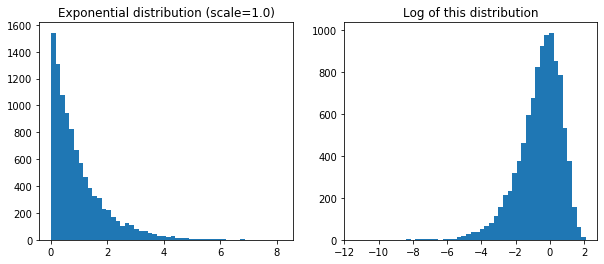

In [57]:
expon_distrib = expon(scale=1.)
samples = expon_distrib.rvs(10000, random_state=42)
plt.figure(figsize=(10, 4))
plt.subplot(121)
plt.title("Exponential distribution (scale=1.0)")
plt.hist(samples, bins=50)
plt.subplot(122)
plt.title("Log of this distribution")
plt.hist(np.log(samples), bins=50)
plt.show()

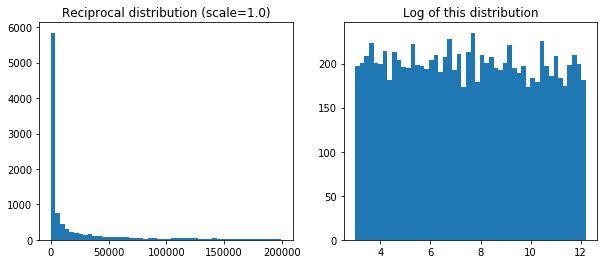

In [58]:
reciprocal_distrib = reciprocal(20, 200000)
samples = reciprocal_distrib.rvs(10000, random_state=42)
plt.figure(figsize=(10, 4))
plt.subplot(121)
plt.title("Reciprocal distribution (scale=1.0)")
plt.hist(samples, bins=50)
plt.subplot(122)
plt.title("Log of this distribution")
plt.hist(np.log(samples), bins=50)
plt.show()

**Ensemble Methods**

Another way to fine-tune the system is to try to combine the models that perform best. The group (or “ensemble”) will often perform better than the best individual model (just like Random Forests perform better than the individual Decision Trees they rely on), especially if the individual models make very different types of errors.
(More detail in Chapter 7).

**Analyze the Best Models and Their Errors**

We often gain good insights on the problem by inspecting the best models. For example, the RandomForestRegressor can indicate the relative importance of each attribute for making accurate predictions

In [81]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([6.31265045e-02, 5.65786242e-02, 3.95749549e-02, 1.30734945e-02,
       1.27789753e-02, 1.33181546e-02, 1.21832018e-02, 3.14637967e-01,
       3.91865499e-02, 4.24858784e-02, 6.50833567e-02, 3.39983524e-02,
       6.26005118e-02, 4.92565758e-02, 5.93472996e-03, 1.70727532e-01,
       1.65457380e-04, 1.98755869e-03, 3.30161964e-03])

We display these importance scores next to their corresponding attribute names

In [91]:
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
cat_one_hot_attribs = list(encoder.classes_)
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
#sorted(zip(feature_importances, attributes), reverse=True)
sorted(zip(feature_importances, attributes), reverse=True)[:k]

[(0.31463796707793357, 'median_income'),
 (0.1707275323764368, 'INLAND'),
 (0.06508335668210852, 'population_per_household'),
 (0.06312650448651075, 'longitude'),
 (0.06260051180847816, 'pop_per_hhold')]

With this information, we want to try dropping some of the less useful features (apparently only one ocean_proximity category is really useful, so we could try dropping the others). We should also look at the specific errors the system makes, then try to understand why it makes them and what could fix the problem (adding extra features or or get rid of uninformative ones, cleaning up outliers, etc.).

**Evaluate your system on the TestSet**

After tweaking the models for a while, we  will eventually have a system that performs sufficiently well. Now is the time to evaluate the final model on the test set. There is nothing special about this process; just get the predictors and the labels from the test set, run full_pipeline to transform the data (call transform(), not fit_transform()), and evaluate the final model on the test set

In [83]:
final_model = rnd_search.best_estimator_

X_test = test_set

X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

/anaconda3/envs/dat158/lib/python3.7/site-packages/pandas/core/indexing.py:1418: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


In [84]:
final_predictions

array([190933.60051342, 262204.95974055,  71894.59355623, ...,
        87480.8594276 , 348135.06967929, 108431.83335113])

Convert to csv file for submission

In [108]:
pd.DataFrame(final_predictions).to_csv("HousingFinal.csv")